


# Google Play Store-EDA





# 1. Importing the required packages.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To hide Warning messages.
import warnings
warnings.filterwarnings('ignore')

## 2. Reading Data

In [4]:
df = pd.read_csv (r'C:\Users\HP\playstore-analysis.csv') 

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


## 3. Data Preprocessing


### 3.1 Handling NULL Values

In [6]:
print(df.isnull().sum())

df.dropna(inplace=True) #Dropping Rows with Null values


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


**There are many NULL values in Rating, and few in Type,Content Rating and Versions.**




In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [9]:
df.shape

(8886, 13)

**After removing the rows with Null values and the duplicate entries, We have got 8886 apps to analyze for their ratings and performance.**




#  3.2 Handling Data Types of each Feature

In [10]:
df.dtypes  # Displaying Data types of each feature.

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

**The feature Reviews must be of numerical type. So we should change it.**



In [11]:
df.Reviews = df.Reviews.astype('int64') #Changing to int type.

In [12]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

**Other Features like Size, Installs, Price and Android Vers also must be of numeric type.
The values they are holding must be changed to a proper format so that we can use them for analysis and plots.
Example : '10000+' to 10000**

### Changing the Feature : Installs



In [13]:
newInstalls = []

for row in df.Installs:
    
    row = row[:-1]
    newRow = row.replace(",", "")
    newInstalls.append(float(newRow))
    

df.Installs = newInstalls

df.Installs.head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

### Changing the feature : Size

In [14]:
newSize = []

for row in df.Size:
    newrow = row[:-1]
    try:
        newSize.append(float(newrow))
    except:
        newSize.append(0) #When it says - Size Varies.
    
df.Size = newSize

df.Size.head()

TypeError: 'float' object is not subscriptable

### Changing the feature, Price

In [ ]:
newPrice = []

for row in df.Price:
    if row!= "0":
        newrow = float(row[1:])
    else:
        newrow = 0 
        
    newPrice.append(newrow)
        
df.Price = newPrice

df.Price.head()
    

### Changing the feature, Android Ver

In [ ]:
newVer = []

for row in df['Android Ver']:
    try:
        newrow = float(row[:2])
    except:
        newrow = 0  # When the value is - Varies with device
    
    newVer.append(newrow)
    
df['Android Ver'] =  newVer

df['Android Ver'].value_counts()

## 4. Analyzing Features

### 4.1 Categories

In [ ]:
df.Category.value_counts() #Displaying all the categories and their counts.

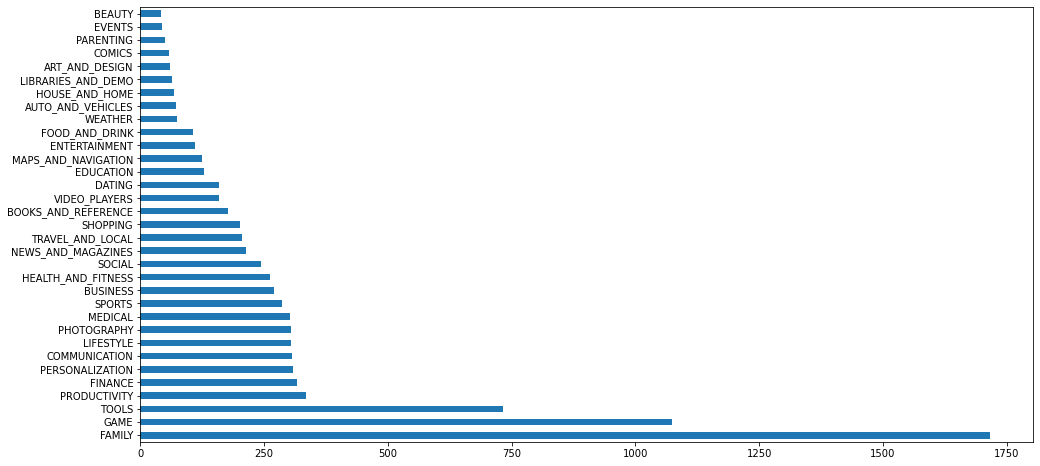

In [15]:
df.Category.value_counts().plot(kind='barh',figsize= (16,8)) 


#Insight : Maximum Number of Apps belong to the Family and Game Category.

## 4.2 Rating

In [31]:
df.Rating.describe()  #Distribution Plot of 'Rating'

count    8886.000000
mean        4.187959
std         0.522428
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

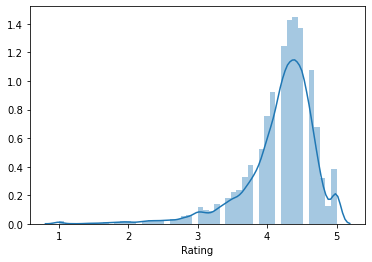

In [32]:
sns.distplot(df.Rating)   


# Insight : Most of the apps, clearly hold a rating above 4.0 ! And surprisingly a lot seem to have 5.0 rating.

In [33]:
print("No. of Apps with full ratings: ",df.Rating[df['Rating'] == 5 ].count())

No. of Apps with full ratings:  271


**There are 271 Apps in the store which hold 5.0 Ratings. Do all of these actually deserve it? Or are these spammed ratings? Lets analyze furthur.**


### 4.3 Consider the Reviews



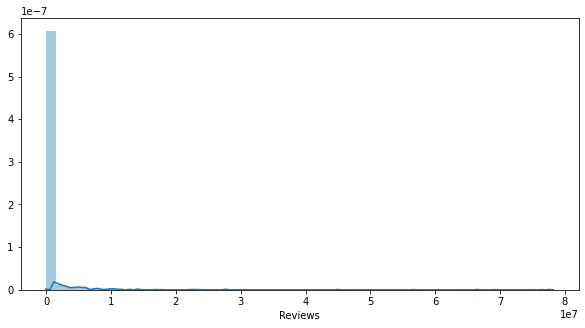

In [34]:
plt.figure(figsize=(10,5))
sns.distplot(df.Reviews)         #Distribution Plot of the feature 'Reviews'

In [35]:
df[df.Reviews>40000000]

#Insight : The most famous Apps like WhatsApp, Facebook and Clash of Clans are the most reviewed Apps as shown above.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,0.0
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,0.0
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,21516.529524,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,0.0
1670,Clash of Clans,GAME,4.6,44891723,98000.000000,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.0
1879,Clash of Clans,GAME,4.6,44893888,98000.000000,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.0
2544,Facebook,SOCIAL,4.1,78158306,21516.529524,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,0.0
2545,Instagram,SOCIAL,4.5,66577313,21516.529524,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0
2604,Instagram,SOCIAL,4.5,66577446,21516.529524,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,21516.529524,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,0.0
3909,Instagram,SOCIAL,4.5,66509917,21516.529524,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0


### 4.4 Type

([<matplotlib.patches.Wedge at 0x243c1fc6cd0>,
 [Text(-1.0744351676595925, 0.2357733456018803, 'Free'),
  Text(1.0744351566222443, -0.23577339589982083, 'Paid')],
 [Text(-0.5860555459961413, 0.12860364305557104, '93.1%'),
  Text(0.5860555399757695, -0.12860367049081134, '6.9%')])

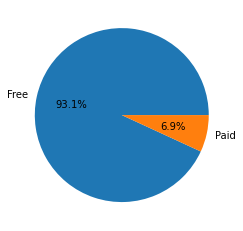

In [36]:
plt.pie(df.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%') 

#Insight: 93% of the Apps are Free in the Play Store.

### 4.5 Price

In [37]:
df[df.Price == df.Price.max()] #Insight : The most costly App in the Store is: I'm Rich - Trump Edition costing 400 Dollars!

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000.0,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.0


### 4.6 Android Version

In [38]:
df['Android Ver'].value_counts() #Count Plot of the various Versions

4.0    5602
0.0    1178
2.0    1160
5.0     500
3.0     246
1.0     104
6.0      46
7.0      45
8.0       5
Name: Android Ver, dtype: int64

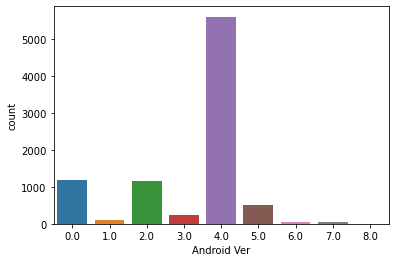

In [39]:
sns.countplot(df['Android Ver']) #Insight : Most of the apps support Android 4.0 and above.

## 5. Further Analysis


### Looking at the Apps with 5.0 ratings:

In [40]:
df_full = df[df.Rating == 5]

df_full.head()    #Distribution plot of 'Installs' of Apps with 5.0 Ratings

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37000.0,1000.0,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,4.0
612,American Girls Mobile Numbers,DATING,5.0,5,4400.0,1000.0,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,4.0
615,Awake Dating,DATING,5.0,2,70000.0,100.0,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.0
633,Spine- The dating app,DATING,5.0,5,9300.0,500.0,Free,0.0,Teen,Dating,"July 14, 2018",4.0,4.0
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5000.0,100.0,Free,0.0,Mature 17+,Dating,"August 1, 2018",8.2,4.0


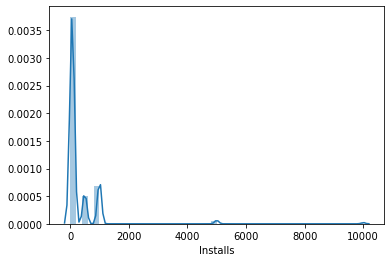

In [41]:
sns.distplot(df_full.Installs)

In [42]:
df_full.Installs.value_counts().sort_index()

#Insight : There are many Apps that have full ratings but less downloads/installs.
#So we can't really consider those apps as the best ones.

1.0          3
5.0          8
10.0        48
50.0        32
100.0      112
500.0       27
1000.0      37
5000.0       3
10000.0      1
Name: Installs, dtype: int64

### Consider the Apps with 5.0 Ratings and Maximum Installs

In [43]:
df_full_maxinstalls = df_full[df.Installs > 1000]

df_full_maxinstalls[['App', 'Category', 'Installs']]

,App,Category,Installs
7514,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5000.0
8058,Oración CX,LIFESTYLE,5000.0
8260,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5000.0
9511,Ek Bander Ne Kholi Dukan,FAMILY,10000.0


### Checking the No. of Reviews of 5.0 Rating Apps

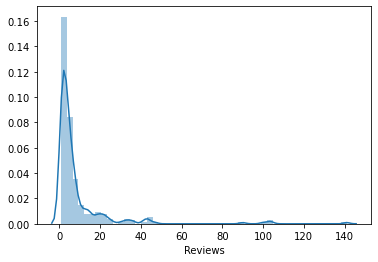

In [44]:
sns.distplot(df_full.Reviews)

**The above distribution is clearly skewed. Apps with very few reviews easily managed to get 5.0 ratings which can be misleading.**

**So let's filter out the ones with more than 30 reviews. These filtered ones are the apps that really stand for 5.0 rating.**

In [50]:
df_full = df_full[df.Reviews > 30]

In [48]:
print("No. of Apps having 5.0 Rating with sufficient Reviews: ",df_full.App.count())

No. of Apps having 5.0 Rating with sufficient Reviews:  16


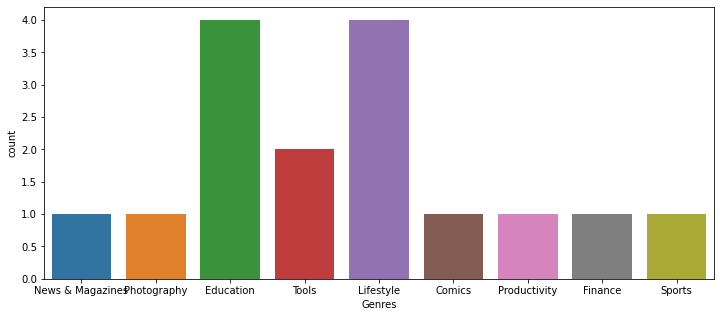

In [47]:
plt.figure(figsize=(12,5))
sns.countplot(df_full.Genres)

**Insight : Apps related to Education, LifeStyle and Tools seem to fetch full Ratings with sufficient number of reviews.**

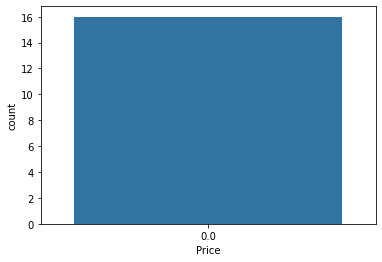

In [51]:
sns.countplot(df_full.Price)

**Insight : All the Apps with 5.0 ratings are Free to install.**


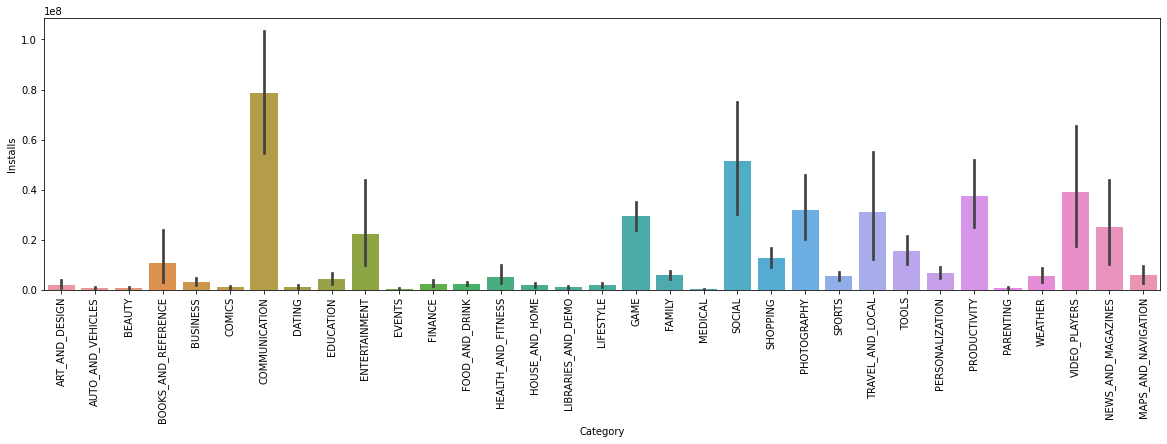

In [19]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='Category', y='Installs', data=df,ax=ax);
plt.xticks(rotation=90);

**From here it is seen that applications of the category 'BOOKS_AND_REFERENCE', 'COMMUNICATIONS', 'ENTERTAINMENT','GAME', 'FAMILY', 'SOCIAL', 'PHOTOGRAPHY', 'TRAVEL_AND_LOCAL', 'TOOL', 'PRODUCTIVITY', 'VIDEOO_PLAYERS' and 'NEWS_AND_MAGAZINES' are installed the most(1billion+ times). Alongwith these, 'HEALTH_AND_FITNESS' is also installed approximately 4.5milliion+ times.**

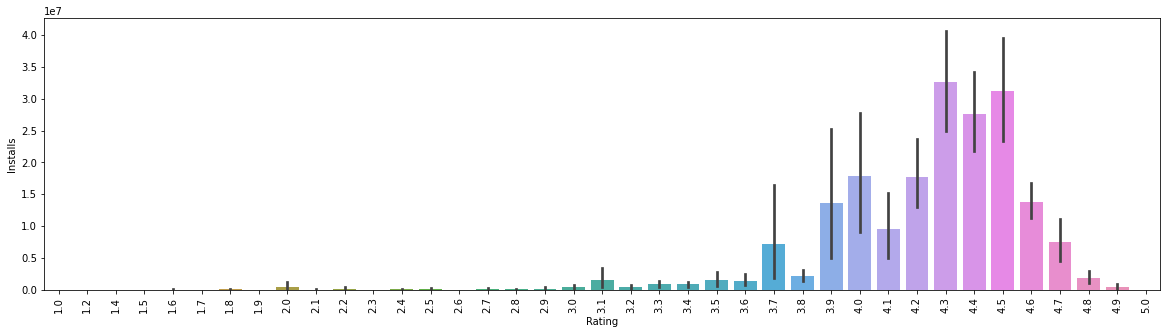

In [20]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='Rating', y='Installs', data=df,ax=ax);
plt.xticks(rotation=90);

**The inference drawn here is apps with rating 4.3,4.5,4.4 are installed 30million+ times, while those with ratings in the range of (3.9, 4.2) as well as of 4.6 are installed 1 million to 2 million+ times. All the others have their number of installations below 1 million.**

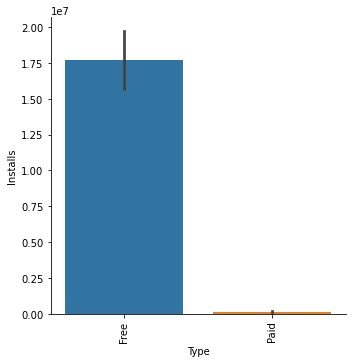

In [21]:
sns.catplot(x='Type', y='Installs', data=df,kind='bar');
plt.xticks(rotation=90);

**As was expected, Free apps are installed more than paid apps.**

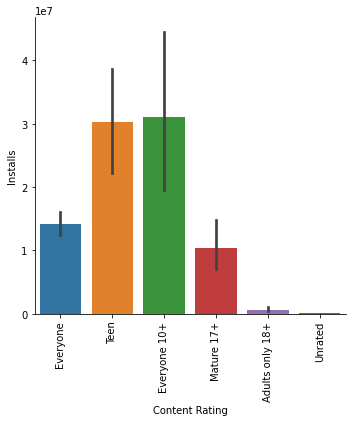

In [23]:
sns.catplot(x='Content Rating', y='Installs', data=df,kind='bar');
plt.xticks(rotation=90);

**Apps targeted at any age groups other than those labelled 'Adults only 18+' and 'Unrated' are installed.
It can however be seen that apps labelled 'Teen' and 'Everyone 10+' are installed 30 million+ times.**

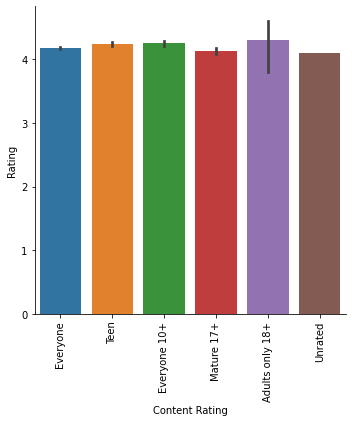

In [33]:
sns.catplot(x='Content Rating', y='Rating', data=df,kind='bar');
plt.xticks(rotation=90);

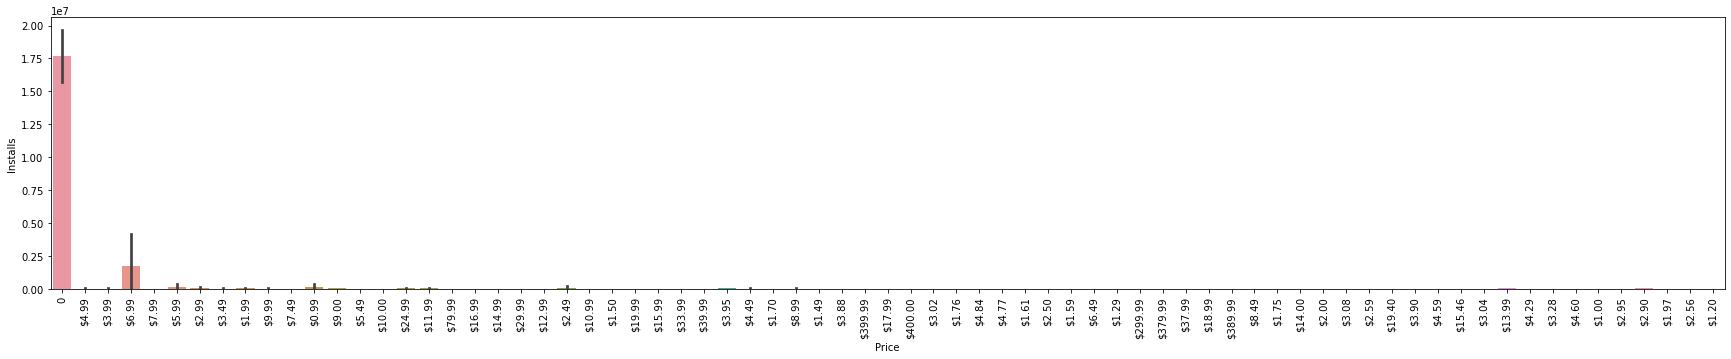

In [31]:
fig, ax = plt.subplots(figsize=(30,5))
sns.barplot(x='Price', y='Installs', data=df,ax=ax);
plt.xticks(rotation=90);

**Again, largely, unpaid apps are installed. Having said that, some paid apps having a cost in range of $$0.99 to $13.99 are downloaded less than 0.25million times**

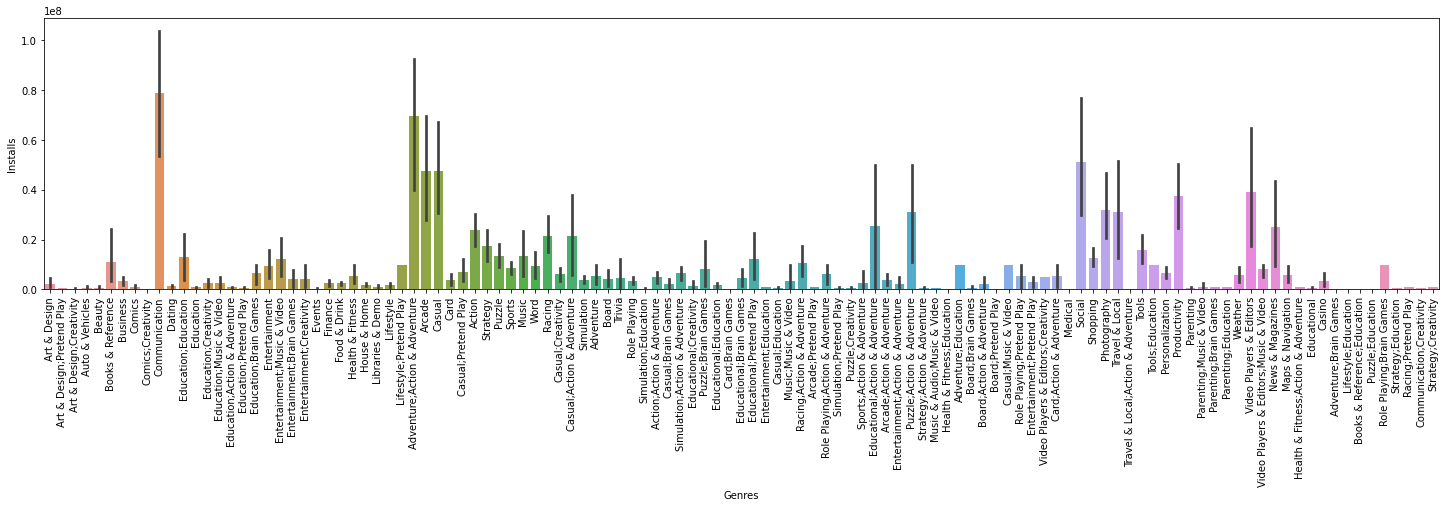

In [35]:
fig, ax = plt.subplots(figsize=(25,5))
sns.barplot(x='Genres', y='Installs', data=df,ax=ax);
plt.xticks(rotation=90);

**Apps with their genres as 'Communication' do exceptionally well. Other genres worth building an app for are 'Adventure:Action&Adventure', 'Arcacde', 'Casual', 'Educational:Action&Adventure', 
'Casual:Action&Adventure', 'Puzzle:Action&Adventure', 'Social', 'Photography', 'Travel&Local', 'Productivity', 'Video Players & Editors' and 'News & Magazines'.**



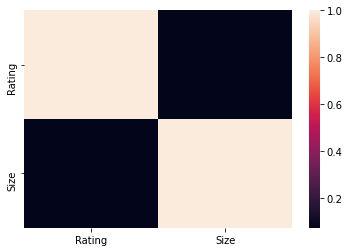

In [14]:
sns.heatmap(df.corr())   #It is a function that shows the analysis of proximity values between data.

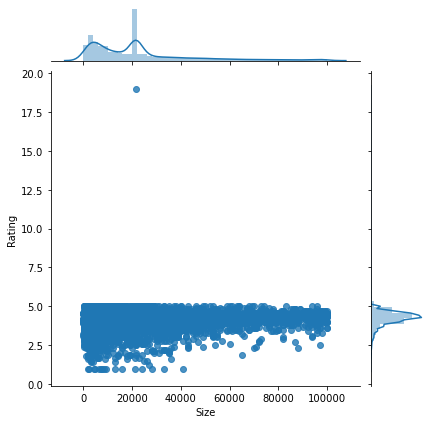

In [18]:
g = sns.jointplot("Size", "Rating", data=df, kind="reg")